In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
# Load in dataframe
df = pd.read_csv('../Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Some variables that I think are interesting based on their descriptions in data_description.txt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
quantitative = [variable for variable in df.columns if df.dtypes[variable] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
categorical  = [variable for variable in df.columns if df.dtypes[variable] == 'object']
print(f'There are {len(quantitative)} quantitative predictor variables and {len(categorical)} categorical predictor variables.')

There are 36 quantitative predictor variables and 43 categorical predictor variables.


In [6]:
#df['MiscFeature'].dropna()
df[['OverallQual','OverallCond']]

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5
...,...,...
1455,6,5
1456,6,6
1457,7,9
1458,5,6


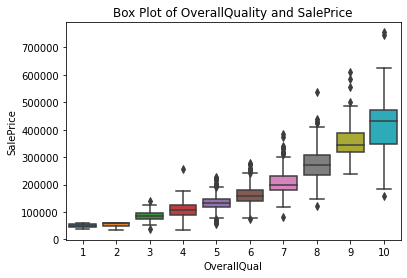

In [7]:
sns.boxplot(x=df['OverallQual'],y=df['SalePrice'])
plt.title('Box Plot of OverallQuality and SalePrice')
plt.show()
# How are overall quality and condition calculated?

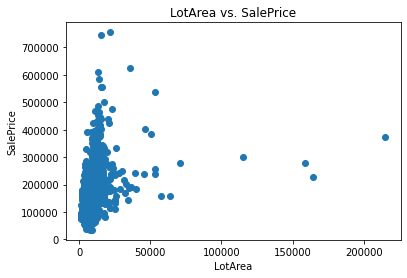

In [8]:
y = 'SalePrice'
x = 'LotArea'
plt.scatter(df[x],df[y])
plt.ylabel(y)
plt.xlabel(x)
plt.title(f'{x} vs. {y}')
plt.show()
# Not as linear as I would've thought

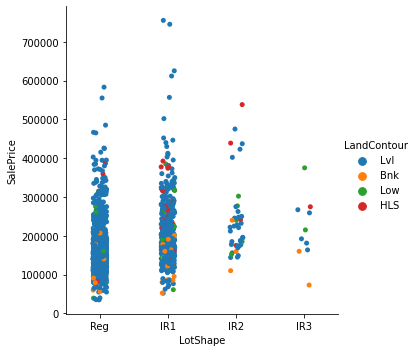

In [9]:
sns.catplot(x='LotShape',y='SalePrice',hue='LandContour',data = df)
plt.show()
# Doesn't seem to be a relationship here

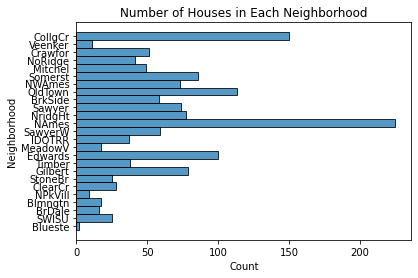

Neighborhood
Blmngtn    194870.88
Blueste    137500.00
BrDale     104493.75
BrkSide    124834.05
ClearCr    212565.43
CollgCr    197965.77
Crawfor    210624.73
Edwards    128219.70
Gilbert    192854.51
IDOTRR     100123.78
MeadowV     98576.47
Mitchel    156270.12
NAmes      145847.08
NPkVill    142694.44
NWAmes     189050.07
NoRidge    335295.32
NridgHt    316270.62
OldTown    128225.30
SWISU      142591.36
Sawyer     136793.14
SawyerW    186555.80
Somerst    225379.84
StoneBr    310499.00
Timber     242247.45
Veenker    238772.73
Name: SalePrice, dtype: float64


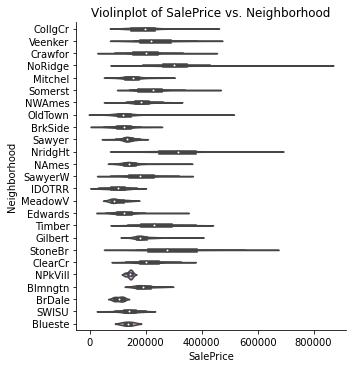

In [10]:
sns.histplot(data = df, y = 'Neighborhood')
plt.title('Number of Houses in Each Neighborhood')
plt.show()
print(round(df.groupby('Neighborhood')['SalePrice'].mean(),2))
sns.catplot(x="SalePrice", y="Neighborhood",kind="violin", data=df)
plt.title('Violinplot of SalePrice vs. Neighborhood')
plt.show()
# As expected, some neighborhoods are more expensive than others. Probably an important variable

In [11]:
df[['YearBuilt','YrSold']]
# I think these two columns could be combined, because we care about how old it was when it was sold
# Also think we should experiment with adjusting saleprice for inflation based on yearsold

,YearBuilt,YrSold
0,2003,2008
1,1976,2007
2,2001,2008
3,1915,2006
4,2000,2008
...,...,...
1455,1999,2007
1456,1978,2010
1457,1941,2010
1458,1950,2010


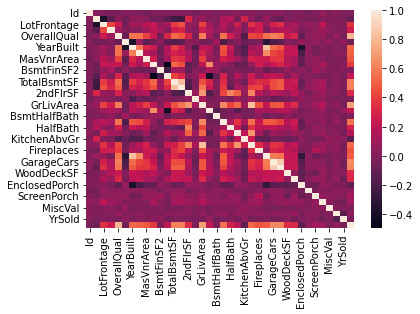

In [12]:
corrmat = df.corr()
sns.heatmap(corrmat)
plt.show()

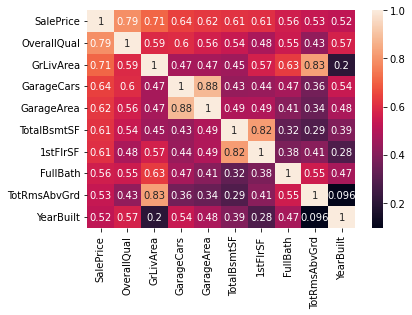

In [13]:
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm   = np.corrcoef(df[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.show()

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64
Skewness: 1.883
Kurtosis: 6.536


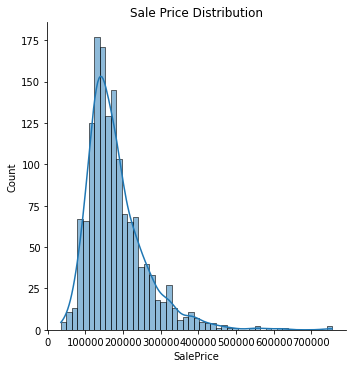

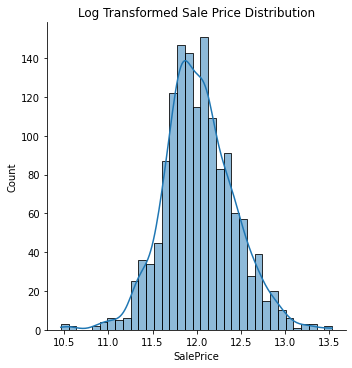

In [14]:
print(round(df['SalePrice'].describe(),2))
print(f"Skewness: {df['SalePrice'].skew():.3f}")
print(f"Kurtosis: {df['SalePrice'].kurt():.3f}")
sns.displot(df['SalePrice'],kde=True)
plt.title('Sale Price Distribution')
plt.show()
sns.displot(np.log(df['SalePrice']),kde=True)
plt.title('Log Transformed Sale Price Distribution')
plt.show()

In [23]:
df.groupby('TotalBsmtSF').size()

TotalBsmtSF
0       37
105      1
190      1
264      3
270      1
        ..
3094     1
3138     1
3200     1
3206     1
6110     1
Length: 721, dtype: int64